### First time series
- create a sequence of dates using pd.date_range()
-  each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.


In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=12, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name)

6 <built-in method day_name of Timestamp object at 0x000001D78F12C1B0>
0 <built-in method day_name of Timestamp object at 0x000001D78F12C7C8>
1 <built-in method day_name of Timestamp object at 0x000001D78F12C8B8>
2 <built-in method day_name of Timestamp object at 0x000001D78F12C930>
3 <built-in method day_name of Timestamp object at 0x000001D78F12C9A8>
4 <built-in method day_name of Timestamp object at 0x000001D78F12CA20>
5 <built-in method day_name of Timestamp object at 0x000001D78F12CA98>
6 <built-in method day_name of Timestamp object at 0x000001D78F12CB10>
0 <built-in method day_name of Timestamp object at 0x000001D78F12CB88>
1 <built-in method day_name of Timestamp object at 0x000001D78F12CC00>
2 <built-in method day_name of Timestamp object at 0x000001D78F12CC78>
3 <built-in method day_name of Timestamp object at 0x000001D78F12CCF0>


#### Create a time series of air quality data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


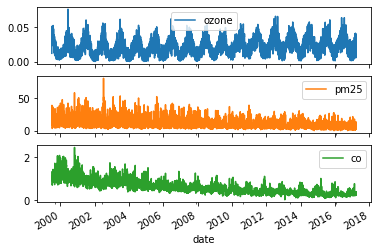

In [3]:
data = pd.read_csv('./data/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()


#### Compare annual stock price trends

In [4]:
yahoo = pd.read_csv('data/yahoo.csv')
yahoo.date = pd.to_datetime(yahoo.date)
yahoo.set_index('date', inplace=True)
yahoo.head(3)

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86


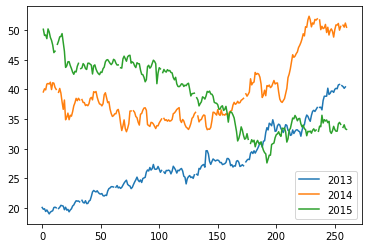

In [5]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
#     print(price_per_year)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

#### Set and change time series frequency
- We have seen how to assign a frequency to a DateTimeIndex, and then change this frequency. 
- set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [6]:
co = pd.read_csv('data/co_cities.csv')
co.date = pd.to_datetime(co.date) # convert str to datetime64
co.set_index('date', inplace=True)
co.head(3)

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


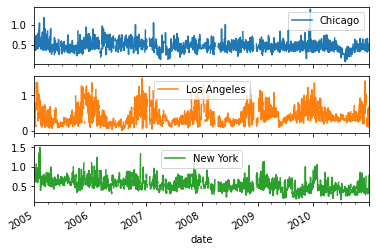

In [7]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()

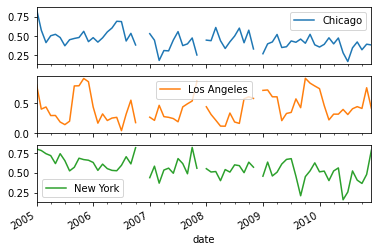

In [8]:

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()


#### Shifting stock prices across time
- `.shift()` allows us to shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.
- Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

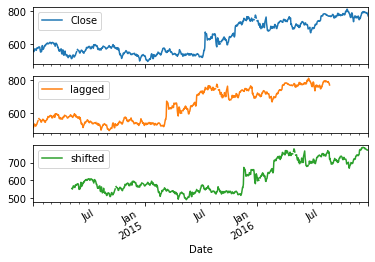

In [9]:
google = pd.read_csv('./data/google.csv', parse_dates=['Date'], index_col='Date')
# print(google.head(3))

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted' that contain the Close shifted by 90 business days into past and future, respectively.
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot(subplots=True)
plt.show()



### Calculating stock price changes
- We have learnt how to calculate returns using current and shifted prices as input. Now we'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function `.diff()`

In [10]:
yahoo = pd.read_csv('./data/yahoo.csv')

# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo['price'].tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo['diff_30'].sub(yahoo['change_30']).value_counts())


777      NaN
778    33.60
779    34.04
780    33.37
781    33.26
Name: price, dtype: float64
0.0    703
dtype: int64


### Plotting multi-period returns
- Use `.pct_change()` to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

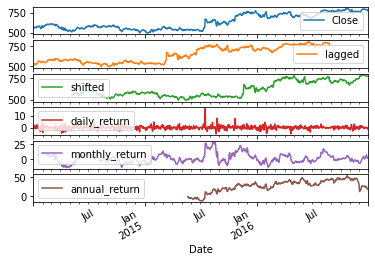

In [11]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()


### Compare the performance of several asset classes
- We can easily compare several time series by normalizing their starting points to 100, and plot the result.
- To broaden our perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

In [12]:
prices = pd.read_csv('./data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())
prices.head(3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41


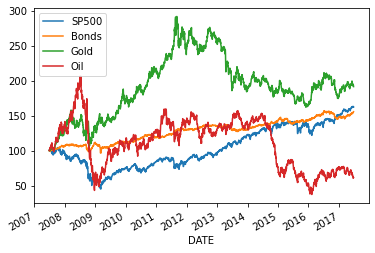

In [13]:
# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot()
plt.show()

- Normalizing series is a common step in time series analysis.

### Comparing stock prices with a benchmark


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


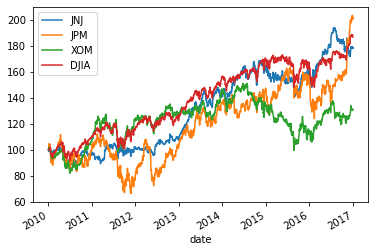

In [14]:
# Import stock prices and index here
stocks = pd.read_csv('./data/nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv('./data/dow_jones.csv', parse_dates=['date'], index_col='date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show()


### Plot performance difference vs benchmark index
- compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

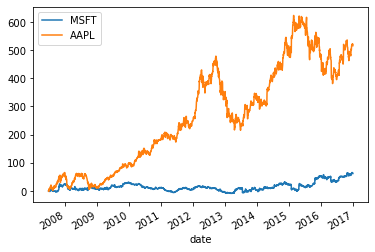

In [15]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Import stock data here
stocks = pd.read_csv('./data/msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('./data/sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()


### Convert monthly to weekly data
- We have learnt to use `.reindex()` to conform an existing time series to a DateTimeIndex at a different frequency.
- Use this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [16]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start, end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1,2,], index=monthly_dates)
print(monthly)

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64


In [17]:
# Create weekly_dates here
weekly_dates = pd.date_range(start, end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print('----'+'Reindex to weekly dates with back fill'+'-----------')
print(monthly.reindex(weekly_dates, method='bfill'))
print('----'+'Reindex to weekly dates with forward fill'+'-----------')
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
----Reindex to weekly dates with back fill-----------
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
----Reindex to weekly dates with forward fill-----------
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


### Create weekly from monthly unemployment data


In [18]:
# Import data here
data = pd.read_csv('./data/unrate.csv', parse_dates=['DATE'], index_col='DATE')

data.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


            UNRATE
DATE              
2010-01-03     NaN
2010-01-10     NaN
2010-01-17     NaN
2010-01-24     NaN
2010-01-31     NaN
            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8
            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8


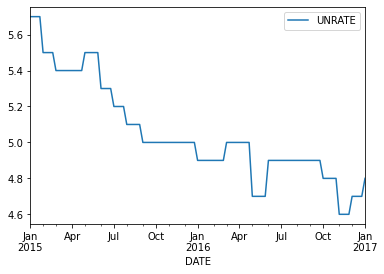

In [19]:
# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()

### Upsampling & interpolation with .resample()

#### Use interpolation to create weekly employment data
- We have used the civilian US unemployment rate, and converted it from monthly to weekly frequency using **simple forward or backfill methods**.
- Compare the previous approach to the new **.interpolate()** method.

In [20]:
monthly = pd.read_csv('./data/unrate.csv', parse_dates=['DATE'], index_col='DATE')
monthly.head(3)

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
None


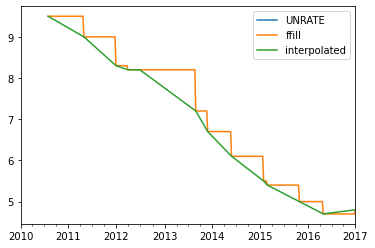

In [21]:
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(),freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly

weekly.plot()
plt.show()

#### Interpolating is a useful way to create smoother time series when resampling.

#### Interpolate debt/GDP and compare to unemployment
- Apply interpolate to quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


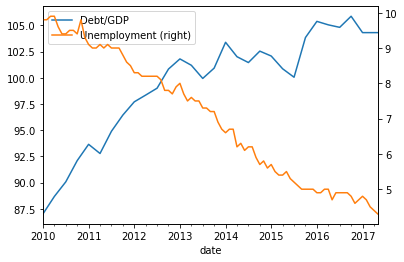

In [22]:
# Import & inspect data here
data = pd.read_csv('data/debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()


### Compare weekly, monthly and annual ozone trends for NYC & LA

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


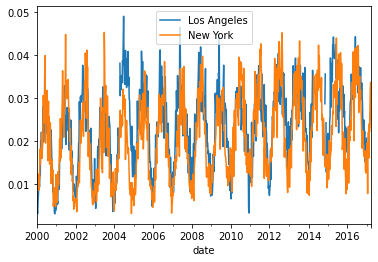

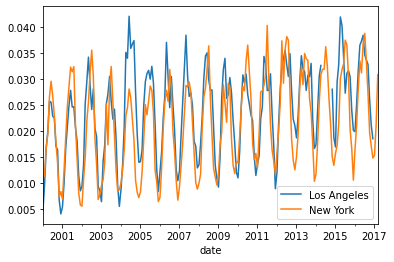

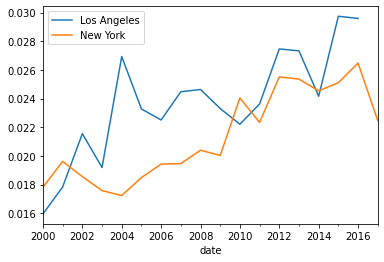

In [23]:
# Import and inspect data here
ozone = pd.read_csv('./data/ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()

plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()

plt.show()

### Compare monthly average stock prices for Facebook and Google


In [25]:
# Import and inspect data here
stocks = pd.read_csv('./data/goog_fb.csv', parse_dates=['date'], index_col=['date'])
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()

monthly_average.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


,FB,GOOG
date,,
2015-01-31,76.721500,512.418000
2015-02-28,76.951579,537.992105
2015-03-31,81.012727,559.715909
2015-04-30,82.090000,540.497619
2015-05-31,79.419500,535.239000


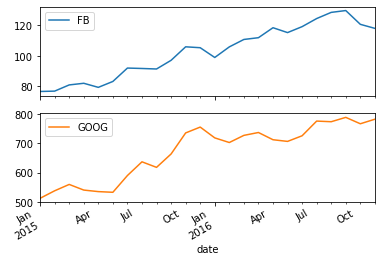

In [26]:
monthly_average.plot(subplots=True)

plt.show()

### Compare quarterly GDP growth rate and stock returns
- With our new skill to downsample and aggregate time series, we can compare higher-frequency stock price series to lower-frequency economic time series.

In [27]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('./data/gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.head(3)

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7


In [28]:
# Import and inspect djia here
djia = pd.read_csv('./data/djia.csv', parse_dates=['date'], index_col='date')
djia.head(3)


,djia
date,
2007-06-29,13408.62
2007-07-02,13535.43
2007-07-03,13577.30


In [29]:
# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly.head(3)

,djia
date,
2007-04-01,13408.62
2007-07-01,13535.43
2007-10-01,14087.55


In [30]:
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

djia_quarterly_return.head()

,djia
date,
2007-04-01,NaN
2007-07-01,0.945735
2007-10-01,4.079072
2008-01-01,-7.407889
2008-04-01,-2.986823


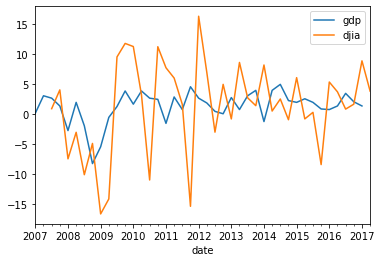

In [31]:
# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

data.plot()
plt.show();


### Visualize monthly mean, median and standard deviation of S&P500 returns

In [32]:
# Import data here
sp500 = pd.read_csv('./data/sp500.csv', parse_dates=['date'], index_col='date')

sp500.head(3)

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87


In [33]:
# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

daily_returns.head(3)

date
2007-06-29         NaN
2007-07-02    0.010696
2007-07-03    0.003580
Name: SP500, dtype: float64

In [35]:
# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean','median','std'])
stats.head(3)


,mean,median,std
date,,,
2007-06-30,NaN,NaN,NaN
2007-07-31,-0.001490,0.000921,0.010908
2007-08-31,0.000668,0.001086,0.015261


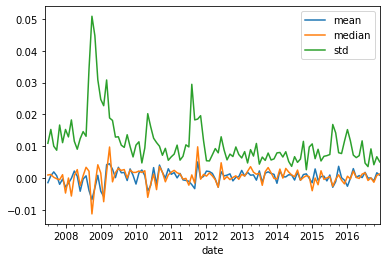

In [36]:
# Plot stats here
stats.plot()
plt.show()